In [11]:
import glob
import re
import numpy as np
import pandas as pd
import clima_anom as ca
from netCDF4 import Dataset

import matplotlib.pyplot as plt

import matplotlib.cbook
import matplotlib.gridspec as gridspec

import cartopy
import cartopy.crs as ccrs

In [12]:
year = '2021'

In [15]:
for t in range(12):

    month = str(t+1).zfill(2)
    de, _, _, name = ca.days_number(year,month)
    
    lista = glob.glob('/media/arturo/Arturo/Data/IMERG/raw/'+ year +'/*.nc4')
    lista = np.sort(lista)

    lista_month = []
    for tt in range(len(lista)):
        
        filename_split = re.split(r'[/.-]+', lista[tt])[13]
        
        yy = filename_split[0:4]
        mm = filename_split[4:6]
        
        if yy == year and mm == month:

            lista_month.append(lista[tt])

    salida = np.zeros([de,801,650])

    a = 0
    for mm in range(de):

        # print('dia: ',mm+1)
        dd_ref = str(mm+1).zfill(2)
        total_dia = 0

        for nn in range(len(lista_month)):

            filename_split = re.split(r'[/.-]+', lista_month[nn])[13]
            dd = filename_split[6:8]

            if dd == dd_ref:

                data = Dataset(lista_month[nn],mode="r")
                prec = data["precipitationCal"][0,:,:].data.T
                prec[prec==np.min(prec)]=0

                if a == 0:

                    total_dia = np.copy(prec)

                    lat = np.array(data['lat'])
                    lon = np.array(data['lon'])

                    lat_bnd = np.where((lat >= -60) & (lat <= 15))[0]
                    lat = lat[lat_bnd]
                    lon_bnd = np.where((lon >= -90) & (lon <= -30))[0]
                    lon = lon[lon_bnd]

                total_dia = total_dia + prec

            salida[mm,:,:] = total_dia

        a = a + 1

    salida = salida[:,lat_bnd[0]:lat_bnd[-1]+1,lon_bnd[0]:lon_bnd[-1]+1]
    ntime, nlat, nlon = np.shape(salida)

    file_name_out = "/mnt/Data/Data/IMERG/Daily_01x01/IMERG_"+ year +"_"+ month + "_01x01_daily.nc"

    info = {'file': file_name_out,
            'title': 'IMERG precipitation data IR + microwave + gauge 0.1x0.1', 
            'year_start':int(year),'month_start':int(month),'day_start':1,'hour_start':0,'minute_start':0,
            'year_end':int(year),'month_end':int(month),'day_end':de,'hour_end':23,'minute_end':55,
            'time_frequency': 'daily', 
            'time_interval': 1,
            'var_name': 'prec', 
            'var_units': 'mm/dia'}

    print()
    ca.create_netcdf(info,salida,lat,lon)


Ano:  2021
Mes:  Marzo

Time Start: 2021-03-01 00:00:00
Time End: 2021-03-31 00:00:00
Time Frequency: daily
Time Lenght: 31

File created in:  /mnt/Data/Data/IMERG/Daily_01x01/IMERG_2021_03_01x01_daily.nc
File title:  IMERG precipitation data IR + microwave + gauge 0.1x0.1
var title:  prec
var units:  mm/dia
Ano:  2021
Mes:  Abril

Time Start: 2021-04-01 00:00:00
Time End: 2021-04-30 00:00:00
Time Frequency: daily
Time Lenght: 30

File created in:  /mnt/Data/Data/IMERG/Daily_01x01/IMERG_2021_04_01x01_daily.nc
File title:  IMERG precipitation data IR + microwave + gauge 0.1x0.1
var title:  prec
var units:  mm/dia
Ano:  2021
Mes:  Mayo

Time Start: 2021-05-01 00:00:00
Time End: 2021-05-31 00:00:00
Time Frequency: daily
Time Lenght: 31

File created in:  /mnt/Data/Data/IMERG/Daily_01x01/IMERG_2021_05_01x01_daily.nc
File title:  IMERG precipitation data IR + microwave + gauge 0.1x0.1
var title:  prec
var units:  mm/dia


In [16]:
salida.shape

(31, 750, 600)

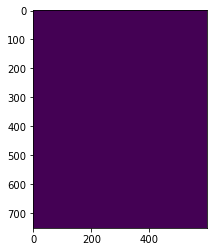

In [17]:
plt.imshow(salida[0,:,:])